## GDV - LO4: Grammar of Graphic Tools

In [172]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

In [195]:
df = pd.read_csv("penguins.csv")

# Remove unnused column
df = df.drop(columns=['Unnamed: 0'])

# Shorten Species because its too long to show in the legend
df = df.replace("Adelie Penguin (Pygoscelis adeliae)", "Adelie")
df = df.replace("Chinstrap penguin (Pygoscelis antarctica)", "Chinstrap")
df = df.replace("Gentoo penguin (Pygoscelis papua)", "Gentoo")

df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


### Data

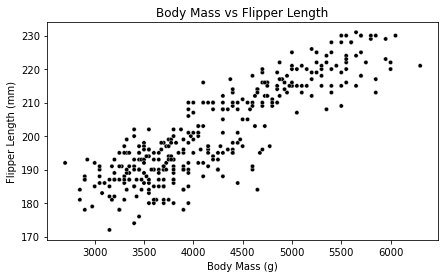

In [98]:
plt.figure(figsize=(7,4))

g = sns.scatterplot(
    data = df,
    x = "Body Mass (g)", 
    y = "Flipper Length (mm)",
    color = "Black",
    size = 1,
    legend = False
)

plt.title("Body Mass vs Flipper Length")
plt.show(g)

### Aesthetics

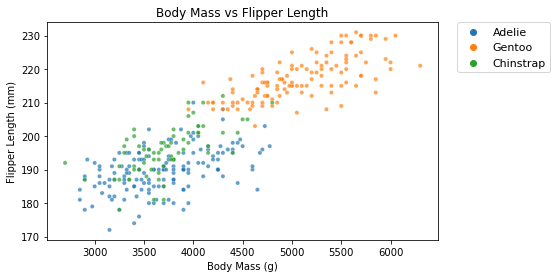

In [71]:
plt.figure(figsize=(7,4))

g = sns.scatterplot(
    data = df,
    x = "Body Mass (g)", 
    y = "Flipper Length (mm)",
    hue = "Species",
    size = 1,
    alpha = 0.7
)

# remove size from legend and move legend outside of plot
h,l = g.get_legend_handles_labels()
plt.legend(h[0:3],l[0:3],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=11)

plt.title("Body Mass vs Flipper Length")
plt.show(g)

### Scale

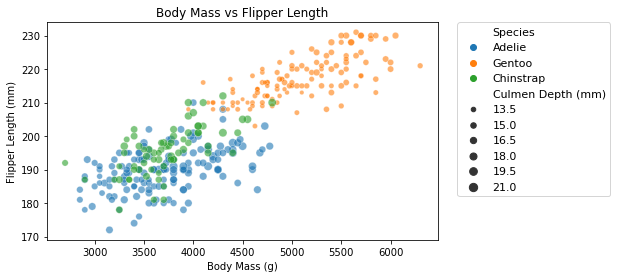

In [94]:
plt.figure(figsize=(7,4))

g = sns.scatterplot(
    data = df,
    x = "Body Mass (g)", 
    y = "Flipper Length (mm)",
    hue = "Species",
    size = "Culmen Depth (mm)",
    alpha = 0.6
)

# remove size from legend and move legend outside of plot
h,l = g.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=11)

plt.title("Body Mass vs Flipper Length")
plt.show(g)

### Geometric Objects

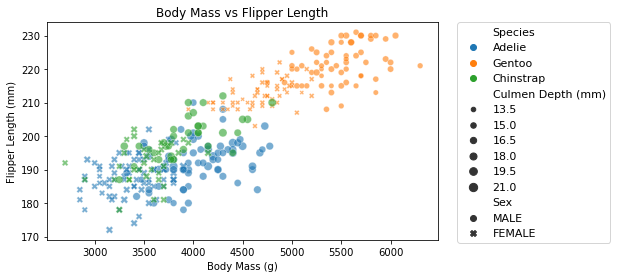

In [95]:
plt.figure(figsize=(7,4))

g = sns.scatterplot(
    data = df,
    x = "Body Mass (g)", 
    y = "Flipper Length (mm)",
    hue = "Species",
    size = "Culmen Depth (mm)",
    style = "Sex",
    alpha = 0.6
)

# remove size from legend and move legend outside of plot
h,l = g.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=11)

plt.title("Body Mass vs Flipper Length")
plt.show(g)

### Statistics

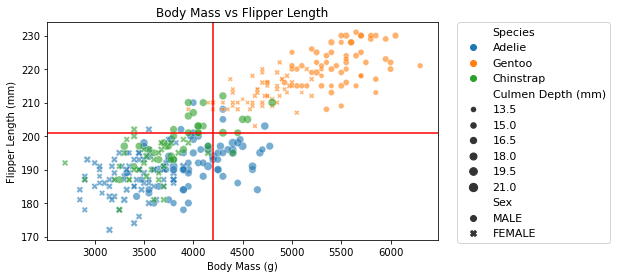

In [126]:
plt.figure(figsize=(7,4))

g = sns.scatterplot(
    data = df,
    x = "Body Mass (g)", 
    y = "Flipper Length (mm)",
    hue = "Species",
    size = "Culmen Depth (mm)",
    style = "Sex",
    alpha = 0.6
)

# Vertical line 
plt.axvline(x = df["Body Mass (g)"].mean(),
            color='red')

# Horizontal line
plt.axhline(y = df["Flipper Length (mm)"].mean(),
            color='red')

# remove size from legend and move legend outside of plot
h,l = g.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=11)

plt.title("Body Mass vs Flipper Length")
plt.show(g)

### Facets

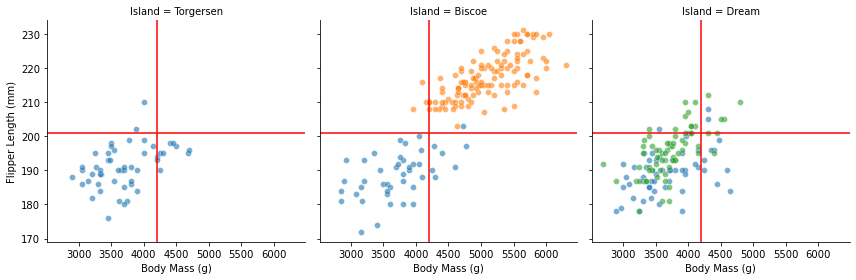

In [170]:
g = sns.FacetGrid(df, col="Island", hue = "Species", height = 4)
g = g.map(sns.scatterplot, "Body Mass (g)", "Flipper Length (mm)", alpha = 0.6)

for ax in g.axes_dict.values():
    ax.axvline(x = df["Body Mass (g)"].mean(), color = "red")
    ax.axhline(y = df["Flipper Length (mm)"].mean(), color = "red")


In [197]:
# Drop rows with NAN in Sex column
df1 = df[df["Sex"].isna() == False]

# Check if there are any NAN in Sex
df1["Sex"].isna().sum()

0

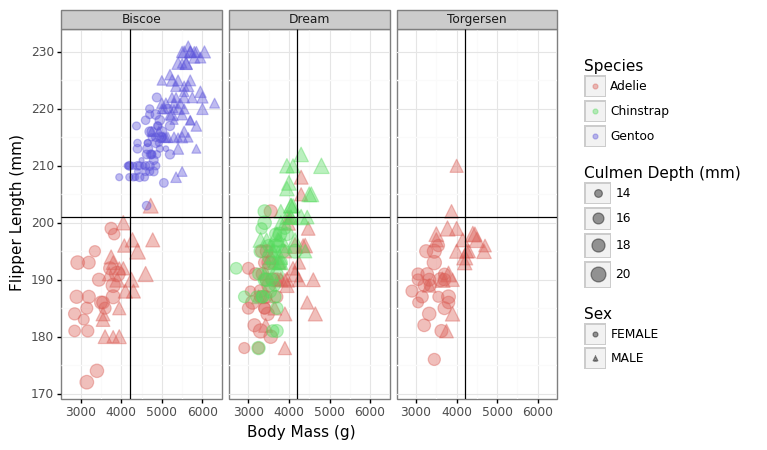

<ggplot: (77499696324)>

In [205]:
(ggplot(df1, aes(x = 'Body Mass (g)', y = 'Flipper Length (mm)', color='Species', size='Culmen Depth (mm)', shape = 'Sex'))
 + geom_point(alpha = 0.4) 
 + facet_wrap('Island') 
 + geom_hline(yintercept = df1['Flipper Length (mm)'].mean())
 + geom_vline(xintercept = df1['Body Mass (g)'].mean())
 + theme_bw()
)

### Coordinate System

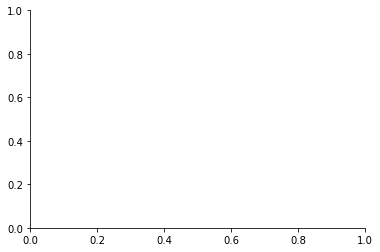

In [218]:
# Cartesian

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

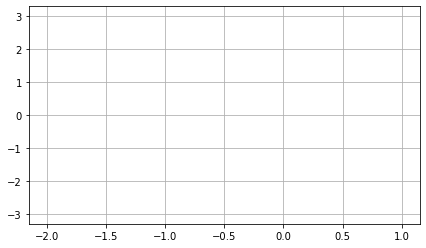

In [257]:
# Plot random dots
x = [0,1,-1,-2]
y = [0,3,1,-3]

plt.figure(figsize=(7,4))

plt.scatter(x,y, color="white")
plt.grid()
plt.show()

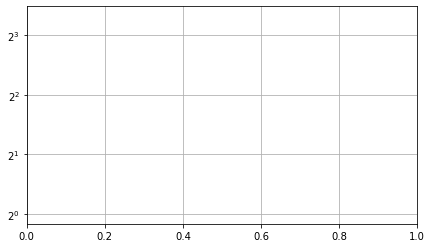

In [256]:
plt.figure(figsize=(7,4))
plt.yscale('log',base=2)
plt.grid()